In [ ]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
import os

from flare_timestamps import get_timestamps
from flare_timestamps import get_rotation_period
from flare_timestamps2 import get_timestamps_2
from flare_timestamps2 import get_rotation_period_2

In order to plot the bolometric energy/flare intensity against the standard deviation or the peak to peak value, the arrays have to be organized. Firstly the respective arrays have to be loaded in.

In [ ]:
combined1= np.loadtxt('combined1_std.txt')
combined5= np.loadtxt('combined5_std.txt')
combined10= np.loadtxt('combined10_std.txt')
combined20= np.loadtxt('combined20_std.txt')
combined40= np.loadtxt('combined40_std.txt')

Before creating the final plots, the linear regression has to be calculated  for each interval.

In [ ]:
# slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(combined1[:,0], combined1[:,1])
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(combined1[:,0], combined1[:,1])
slope5, intercept5, r_value5, p_value5, std_err5 = stats.linregress(combined5[:,0], combined5[:,1])
slope10, intercept10, r_value10, p_value10, std_err10 = stats.linregress(combined10[:,0], combined10[:,1])
slope20, intercept20, r_value20, p_value20, std_err20 = stats.linregress(combined20[:,0], combined20[:,1])
slope40, intercept40, r_value40, p_value40, std_err40 = stats.linregress(combined40[:,0], combined40[:,1])

Now the arrays can be plotted against each other. The linear regression line can also be plotted using the calculated slope and intercept.

In [ ]:
#plot the bolometric energy against the standard deviations in separate subplots for each standard deviation and mark the linear regression
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.scatter(combined1[:,0], combined1[:,1], s=1)
plt.plot(combined1[:,0], intercept1 + slope1*combined1[:,0], 'r', label=np.round(r_value1, 3))
plt.xlabel('Bolometric energy [ergs]')
plt.ylabel('Standard deviation [ΔF/F]')
plt.grid()
plt.title('1 day')


plt.subplot(2, 3, 2)
plt.scatter(combined5[:,0], combined5[:,1], s=1)
plt.plot(combined5[:,0], intercept5 + slope5*combined5[:,0], 'r', label=np.round(r_value5, 3))
plt.xlabel('Bolometric energy [ergs]')
plt.ylabel('Standard deviation [ΔF/F]')
plt.grid()
plt.title('5 days')


plt.subplot(2, 3, 3)
plt.scatter(combined10[:,0], combined10[:,1], s=1)
plt.plot(combined10[:,0], intercept10 + slope10*combined10[:,0], 'r', label=np.round(r_value10, 3))
plt.xlabel('Bolometric energy [ergs]')
plt.ylabel('Standard deviation [ΔF/F]')
plt.grid()
plt.title('10 days')

plt.subplot(2, 3, 4)
plt.scatter(combined20[:,0], combined20[:,1], s=1)
plt.plot(combined20[:,0], intercept20 + slope20*combined20[:,0], 'r', label=np.round(r_value20, 3))
plt.xlabel('Bolometric energy [ergs]')
plt.ylabel('Standard deviation [ΔF/F]')
plt.grid()
plt.title('20 days')


plt.subplot(2, 3, 5)
plt.scatter(combined40[:,0], combined40[:,1], s=1)
plt.plot(combined40[:,0], intercept40 + slope40*combined40[:,0], 'r', label=np.round(r_value40, 3))
plt.xlabel('Bolometric energy [ergs]')
plt.ylabel('Standard deviation [ΔF/F]')
plt.grid()
plt.title('40 days')


plt.tight_layout()
plt.show()


For better visualization of the data and further analysis, a histogram is created for the bolometric energies and the standard deviations.

In [ ]:
#do the same but create different plots for each standard deviation and put them next to each other
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.hist(combined1[:,1], bins=100)

plt.grid()
plt.title('1 day')

plt.subplot(2, 3, 2)
plt.hist(combined5[:,1], bins=100)

plt.grid()
plt.title('5 days')

plt.subplot(2, 3, 3)
plt.hist(combined10[:,1], bins=100)

plt.grid()
plt.title('10 days')

plt.subplot(2, 3, 4)
plt.hist(combined20[:,1], bins=100)

plt.grid()
plt.title('20 days')

plt.subplot(2, 3, 5)
plt.hist(combined40[:,1], bins=100)

plt.grid()
plt.title('40 days')

plt.figtext(0, 0.5, 'Number of occurences', ha='center', va='center', rotation='vertical', fontsize= 15)
plt.figtext(0.5, -0.01, 'Standard deviation [ΔF/F]', ha='center', va='center', fontsize= 15)

plt.tight_layout()
plt.show()

Now the standard deviation cna be plotted against the flare intensity (flare hight). The linear regression line can also be plotted using the calculated slope and intercept. 

In [ ]:
combined1= np.loadtxt('combined1_hight.txt')
combined5= np.loadtxt('combined5_hight.txt')
combined10= np.loadtxt('combined10_hight.txt')
combined20= np.loadtxt('combined20_hight.txt')
combined40= np.loadtxt('combined40_hight.txt')

In [ ]:

#calculate the linear regressions
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(combined1[:,0], combined1[:,1])
slope5, intercept5, r_value5, p_value5, std_err5 = stats.linregress(combined5[:,0], combined5[:,1])
slope10, intercept10, r_value10, p_value10, std_err10 = stats.linregress(combined10[:,0], combined10[:,1])
slope20, intercept20, r_value20, p_value20, std_err20 = stats.linregress(combined20[:,0], combined20[:,1])
slope40, intercept40, r_value40, p_value40, std_err40 = stats.linregress(combined40[:,0], combined40[:,1])



#plot the arrays in separate subplots
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(combined1[:,0], combined1[:,1], s=1)
plt.plot(combined1[:,0], intercept1 + slope1*combined1[:,0], 'r', label=np.round(r_value1  , 3))

plt.grid()

plt.title('1 day')

plt.subplot(2, 3, 2)
plt.scatter(combined5[:,0], combined5[:,1], s=1)
plt.plot(combined5[:,0], intercept5 + slope5*combined5[:,0], 'r', label=np.round(r_value5  , 3))

plt.grid()

plt.title('5 days')

plt.subplot(2, 3, 3)
plt.scatter(combined10[:,0], combined10[:,1], s=1)
plt.plot(combined10[:,0], intercept10 + slope10*combined10[:,0], 'r', label=np.round(r_value10  , 3))

plt.grid()

plt.title('10 days')

plt.subplot(2, 3, 4)
plt.scatter(combined20[:,0], combined20[:,1], s=1)
plt.plot(combined20[:,0], intercept20 + slope20*combined20[:,0], 'r', label=np.round(r_value20  , 3))

plt.grid()

plt.title('20 days')

plt.subplot(2, 3, 5)
plt.scatter(combined40[:,0], combined40[:,1], s=1)
plt.plot(combined40[:,0], intercept40 + slope40*combined40[:,0], 'r', label=np.round(r_value40  , 3))

plt.grid()

plt.title('40 days')

plt.figtext(0.5, 0, 'Flare intensity [ΔF/F]', ha='center', va='center', fontsize= 15)
plt.figtext(0, 0.5, 'Standard deviation [ΔF/F]', ha='center', va='center', rotation='vertical', fontsize= 15)

plt.tight_layout()
plt.show()


Next, the plots for the peak to peak value are created. This is done similarly as for the standard deviation with by loading in the respective arrays and combining them. The linear regression is calculated and the plot is created.

In [31]:
#plot th peak to peak value against the bolometric luminosity

bolom_energy = np.loadtxt('superflares.txt', usecols=13)

peak_peak = np.loadtxt('peak_peak.txt')

#go through the peak_peak array and remove the and add a zero where there is a nan value
for i in range(len(peak_peak)):
    if np.isnan(peak_peak[i]):
        peak_peak[i] = 0
    else:
        peak_peak[i] = peak_peak[i]

#make it so that the two arrays have the same length
bolom_energy = bolom_energy[:len(peak_peak)]

#combine the two arrays by stacking the columns
bol_peak = np.column_stack((bolom_energy, peak_peak))


#go through the array and remove the lines where the first column is zero
for i in range(len(bol_peak)):
    if bol_peak[i,0] == 0:
        bol_peak = np.delete(bol_peak, i, 0)
    else:
        bol_peak[i,0] = bol_peak[i,0]

        
#do the same as as the above but with the peak_peak_2
bolom_energy2 = np.loadtxt('superflares_2.txt', usecols=13)

peak_peak2 = np.loadtxt('peak_peak_2.txt')

#go through the peak_peak array and remove the and add a zero where there is a nan value
for i in range(len(peak_peak2)):
    if np.isnan(peak_peak2[i]):
        peak_peak2[i] = 0
    else:
        peak_peak2[i] = peak_peak[i]

#make it so that the two arrays have the same length
bolom_energy2 = bolom_energy2[:len(peak_peak2)]

#combine the two arrays by stacking the columns
bol_peak2 = np.column_stack((bolom_energy2, peak_peak2))


#go through the array and remove the lines where the first column is zero
for i in range(len(bol_peak2)):
    if bol_peak2[i,0] == 0:
        bol_peak2 = np.delete(bol_peak2, i, 0)
    else:
        bol_peak2[i,0] = bol_peak2[i,0]


r_value for peak_peak and bolometric energy is: 0.17291020275565872


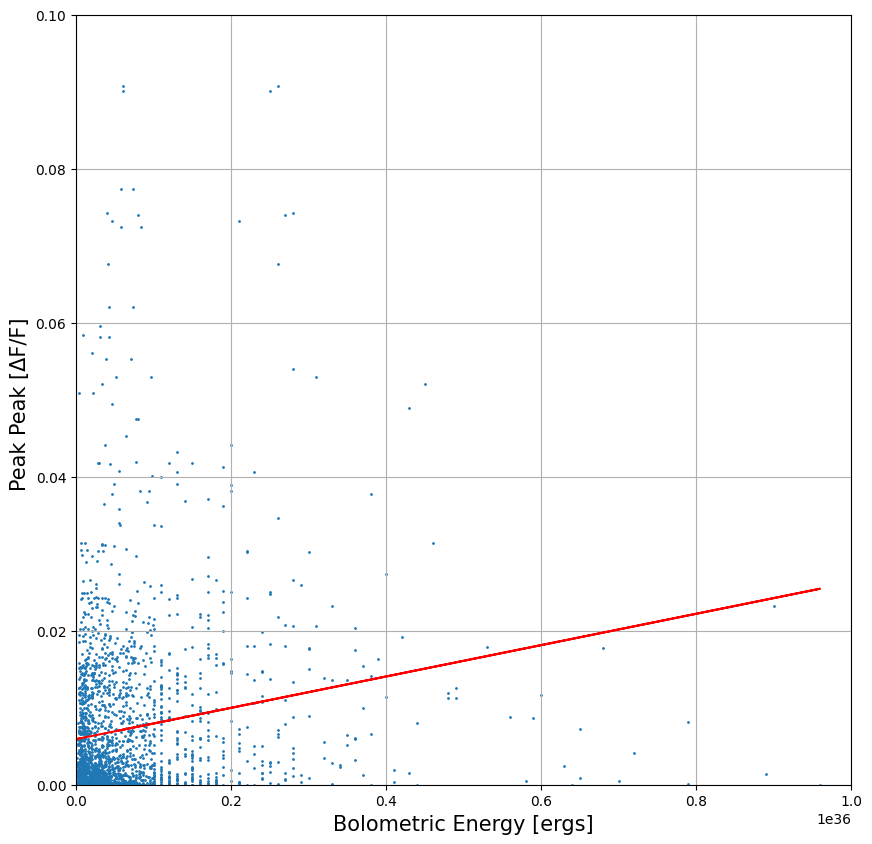

<Figure size 640x480 with 0 Axes>

In [32]:
#combine the bol_peak and bol_peak2 and calculate the linear regression and print out the r value
combine_bol_peak= np.concatenate((bol_peak, bol_peak2), axis=0)

#calculate the linear regression for the peak_peak and bolometric energy and print out the r value
slope, intercept, r_value, p_value, std_err = stats.linregress(combine_bol_peak[:,0], combine_bol_peak[:,1])
print('r_value for peak_peak and bolometric energy is:', r_value)


#plot the bolometric energy on the x axis and the peak_peak on the y axis and plot the linear regression line
plt.figure(figsize=(10,10))
plt.scatter(combine_bol_peak[:,0], combine_bol_peak[:,1], s= 1)
plt.plot(combine_bol_peak[:,0], intercept + slope*combine_bol_peak[:,0], 'red', label='fitted line')
plt.ylim(0, 0.1)
plt.xlim(0, 1e36)
plt.grid()
plt.xlabel('Bolometric Energy [ergs]', fontsize=15)
plt.ylabel('Peak Peak [ΔF/F] ', fontsize=15)
plt.show()
plt.savefig('bol_peak.png')

The peak to peak values from the stars that were categorized according to their rotation period are plotted with the bolometric energy of the flares.

In [34]:
#load in the peak_peak and bolometric energy arrays for the different rotation periods
all5= np.loadtxt('all5.txt')
all10= np.loadtxt('all10.txt')
all20= np.loadtxt('all20.txt')
all40= np.loadtxt('all40.txt')


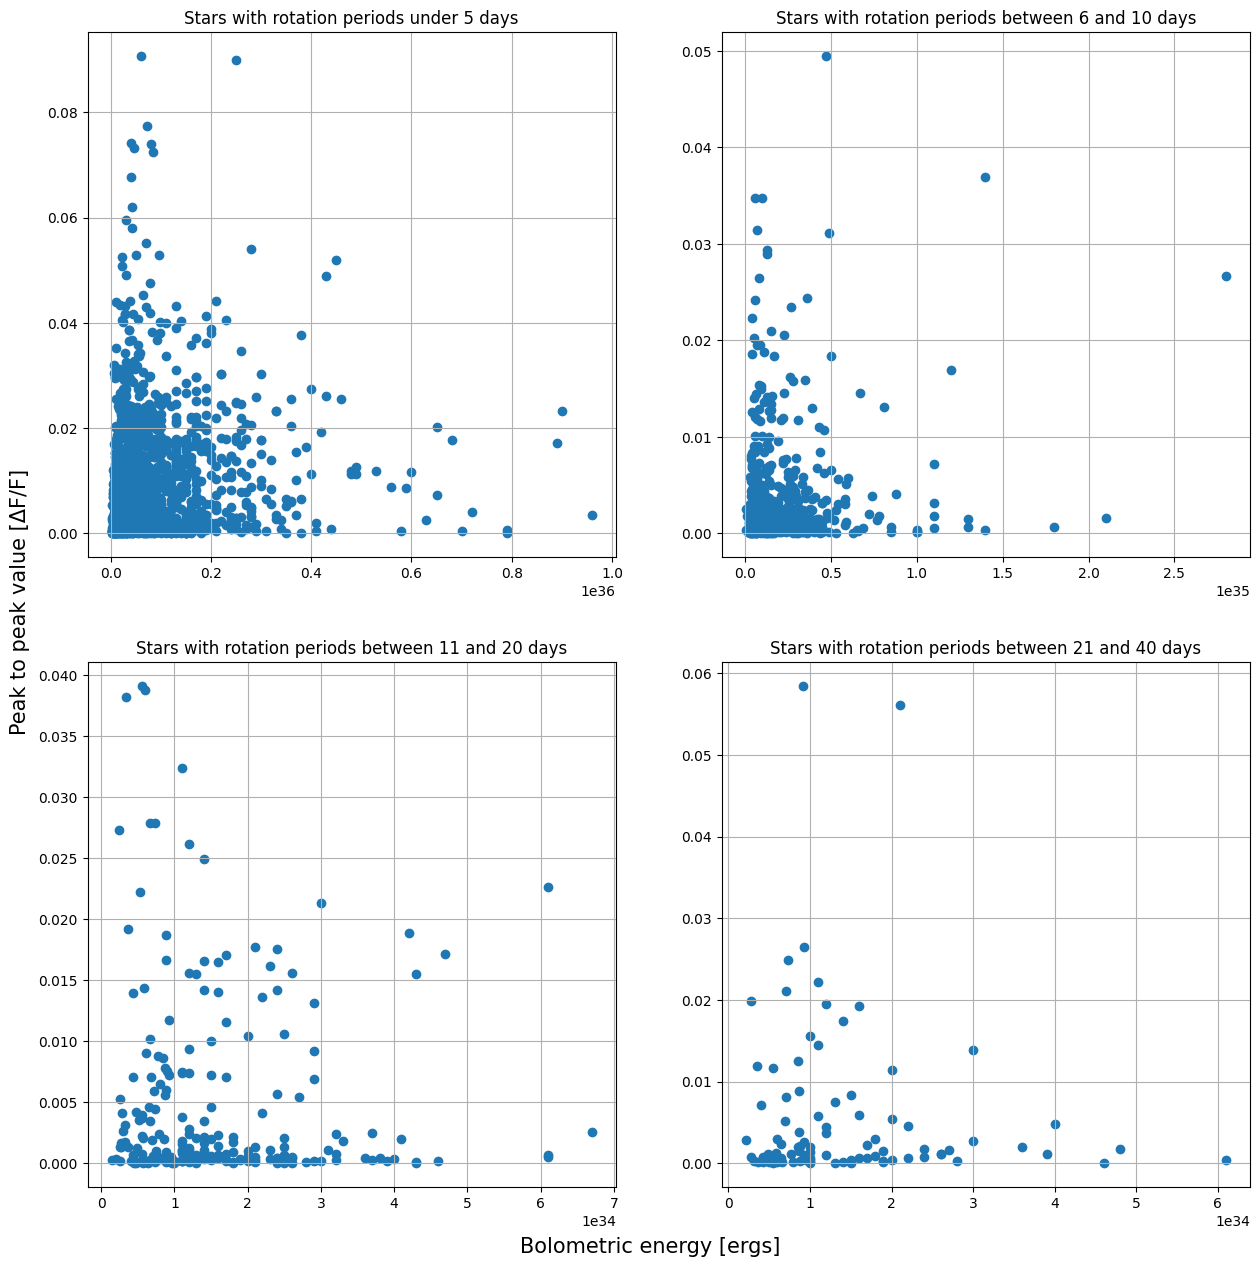

In [35]:
#create the same plots but now as subplots with only one x and y label
fig, axs = plt.subplots(2, 2,figsize=(15,15))
axs[0, 0].scatter(all5[:,2],all5[:,3])
axs[0, 0].set_title('Stars with rotation periods under 5 days')
axs[0, 0].grid(True)

axs[0, 1].scatter(all10[:,2],all10[:,3])
axs[0, 1].set_title('Stars with rotation periods between 6 and 10 days')
axs[0, 1].grid(True)

axs[1, 0].scatter(all20[:,2],all20[:,3])
axs[1, 0].set_title('Stars with rotation periods between 11 and 20 days')
axs[1, 0].grid(True)

axs[1, 1].scatter(all40[:,2],all40[:,3])
axs[1, 1].set_title('Stars with rotation periods between 21 and 40 days')
axs[1, 1].grid(True)

fig.text(0.5, 0.07, 'Bolometric energy [ergs]', ha='center', va='center', rotation='horizontal', fontsize=15)
fig.text(0.08, 0.5, 'Peak to peak value [ΔF/F]', ha='center', va='center', rotation='vertical', fontsize=15)
plt.savefig('peak_bol_categories.jpg')
plt.show()

The same procedure is done when plotting the flare intensity against the peak to peak value. The arrays are loaded and combined. The linear regression is calculated and the plot is created. Here the first seven values are erased because they are outliers. This was determined by searching up the corresponding lightcurves of these flares.

In [ ]:
#make another array combining the peak_peak with the flux hight
peak_peak= np.loadtxt('peak_peak.txt')
peak_peak2= np.loadtxt('peak_peak_2.txt')
peak_peak= np.concatenate((peak_peak,peak_peak2),axis=0)
#write everywhere where there is a nan a 0
peak_peak[np.isnan(peak_peak)] = 0

flux_hight= np.loadtxt('hight_new.txt')
flux_hight2= np.loadtxt('hight2.txt')
flux_hight= np.concatenate((flux_hight,flux_hight2),axis=0)

#make it so that both arrays have the same size
flux_hight= flux_hight[0:peak_peak.size]


#make a new array with the peak_peak and flux_hight
peak_peak_flux_hight= np.column_stack((peak_peak,flux_hight))

#erase all the rows where the peak_peak is 0
peak_peak_flux_hight= peak_peak_flux_hight[~(peak_peak_flux_hight==0).all(1)]

#sort the array by the flux_hight column in descending order and erase the first 7 rows
peak_peak_flux_hight= peak_peak_flux_hight[peak_peak_flux_hight[:,1].argsort()[::-1]]
peak_peak_flux_hight= peak_peak_flux_hight[7:]


#calculate a linear regression with the peak_peak_flux_hight
slope, intercept, r_value, p_value, std_err = stats.linregress(peak_peak_flux_hight [:,1], peak_peak_flux_hight [:,0])

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(peak_peak_flux_hight[:,1],peak_peak_flux_hight[:,0],s=1)
#plot linear regression line calculated before
plt.plot(peak_peak_flux_hight[:,1],peak_peak_flux_hight[:,1]*slope+intercept,color='red')
plt.xlim(0,0.35)
plt.ylim(0,0.1)
plt.grid()
#make the size of the axis titles bigger
plt.xlabel('Flare intensity [ΔF/F]', fontsize=15)
plt.ylabel('Peak to peak value [ΔF/F]' , fontsize=15)
plt.show()

The following plots are the standard deviations of selected stars with different rotation periods. The standard deviations are stored separatly for each target name in the std folders, so they have to be searched and merged together.

In [ ]:
#from the folder "std_1d" load the file "std_1d_10537061.txt"
Path=  'std_1d/std_1d_10537061.txt'

std1= np.loadtxt(Path)

std5= np.loadtxt('std_5d/std_5d_10537061.txt')
std10= np.loadtxt('std_10d/std_10d_10537061.txt')
std20= np.loadtxt('std_20d/std_20d_10537061.txt')
std40= np.loadtxt('std_40d/std_40d_10537061.txt')


merged_array = [list(i) for i in zip(std1, std5, std10, std20, std40)]

mean_merged_array= np.mean(merged_array, axis=0)
# slope, intercept, r_value, p_value, std_err = stats.linregress(mean_merged_array, std1)

The corresponding bolometric energies are found in the superflares.txt file.

In [ ]:

#now open the superflares_2 file and only take the values that are from the target 10537061

superflares= np.loadtxt('superflares_2.txt', usecols=(0,13))

#now search for all rows where the first value is 10537061

superflares_10537061= superflares[superflares[:,0]==10537061]


Repeat the same process for all selected stars.

In [ ]:

#repeat the same process for the target 11140181

superflares_11140181= superflares[superflares[:,0]==11140181]

std1_11140181= np.loadtxt('std_1d/std_1d_11140181.txt')
std5_11140181= np.loadtxt('std_5d/std_5d_11140181.txt')
std10_11140181= np.loadtxt('std_10d/std_10d_11140181.txt')
std20_11140181= np.loadtxt('std_20d/std_20d_11140181.txt')
std40_11140181= np.loadtxt('std_40d/std_40d_11140181.txt')

merged_array_11140181 = [list(i) for i in zip(std1_11140181, std5_11140181, std10_11140181, std20_11140181, std40_11140181)]

mean_merged_array_11140181= np.mean(merged_array_11140181, axis=0)
# slope_11140181, intercept_11140181, r_value_11140181, p_value_11140181, std_err_11140181 = stats.linregress(mean_merged_array_11140181, std1_11140181)
# print(r_value_11140181)

superflares_12109550= superflares[superflares[:,0]==12109550]

std1_12109550= np.loadtxt('std_1d/std_1d_12109550.txt')
std5_12109550= np.loadtxt('std_5d/std_5d_12109550.txt')
std10_12109550= np.loadtxt('std_10d/std_10d_12109550.txt')
std20_12109550= np.loadtxt('std_20d/std_20d_12109550.txt')
std40_12109550= np.loadtxt('std_40d/std_40d_12109550.txt')

merged_array_12109550 = [list(i) for i in zip(std1_12109550, std5_12109550, std10_12109550, std20_12109550, std40_12109550)]


superflares_11818740= superflares[superflares[:,0]==11818740]

std1_11818740= np.loadtxt('std_1d/std_1d_11818740.txt')
std5_11818740= np.loadtxt('std_5d/std_5d_11818740.txt')
std10_11818740= np.loadtxt('std_10d/std_10d_11818740.txt')
std20_11818740= np.loadtxt('std_20d/std_20d_11818740.txt')
std40_11818740= np.loadtxt('std_40d/std_40d_11818740.txt')

merged_array_11818740 = [list(i) for i in zip(std1_11818740, std5_11818740, std10_11818740, std20_11818740, std40_11818740)]

superflares_10387363= superflares[superflares[:,0]==10387363]

std1_10387363= np.loadtxt('std_1d/std_1d_10387363.txt')
std5_10387363= np.loadtxt('std_5d/std_5d_10387363.txt')
std10_10387363= np.loadtxt('std_10d/std_10d_10387363.txt')
std20_10387363= np.loadtxt('std_20d/std_20d_10387363.txt')
std40_10387363= np.loadtxt('std_40d/std_40d_10387363.txt')

merged_array_10387363 = [list(i) for i in zip(std1_10387363, std5_10387363, std10_10387363, std20_10387363, std40_10387363)]


superflares_8610178= superflares[superflares[:,0]==8610178]

std_1d_8610178= np.loadtxt('std_1d_8610178.txt')
std_5d_8610178= np.loadtxt('std_5d_8610178.txt')
std_10d_8610178= np.loadtxt('std_10d_8610178.txt')
std_20d_8610178= np.loadtxt('std_20d_8610178.txt')
std_40d_8610178= np.loadtxt('std_40d_8610178.txt')

merged_array_8610178= [list(i) for i in zip(std_1d_8610178, std_5d_8610178,std_10d_8610178, std_20d_8610178, std_40d_8610178)]
mean_merged_array_8610178= np.mean(merged_array_8610178, axis=0)

superflares_726949= superflares[superflares[:,0]==726949]

std_1d_726949= np.loadtxt('std_1d_7267949.txt')
std_5d_726949= np.loadtxt('std_5d_7267949.txt')
std_10d_726949= np.loadtxt('std_10d_7267949.txt')
std_20d_726949= np.loadtxt('std_20d_7267949.txt')
std_40d_726949= np.loadtxt('std_40d_7267949.txt')

merged_array_726949= [list(i) for i in zip(std_1d_726949, std_5d_726949,std_10d_726949, std_20d_726949, std_40d_726949)]

mean_merged_array_726949= np.mean(merged_array_726949, axis=0)


superflares_3939069= superflares[superflares[:,0]== 3939069]

std_1d_3939069= np.loadtxt('std_1d_3939069.txt')
std_5d_3939069= np.loadtxt('std_5d_3939069.txt')
std_10d_3939069= np.loadtxt('std_10d_3939069.txt')
std_20d_3939069= np.loadtxt('std_20d_3939069.txt')
std_40d_3939069= np.loadtxt('std_40d_3939069.txt')

merged_array_3939069= [list(i) for i in zip(std_1d_3939069, std_5d_3939069, std_10d_3939069, std_20d_3939069, std_40d_3939069)]





Now all the plots for the standard deviation for all measured intervals are created. The rotation period is retrieved from the superflares.txt file in column 6. This is done manually for each star, since it is easier than writing a code for it. 

In [ ]:
x_values= [1, 5, 10, 20, 40]

#calculate a linear regression for all the datasets together


plt.figure(figsize=(10,10))
#go through the merged_array and plot each line as a dataset against the x_values
for i in range(len(merged_array)):
    plt.plot(x_values, merged_array[i], 'o-',)

plt.xticks(x_values)
plt.xlabel('Time interval before the flare [Days]', fontsize=15)
plt.ylabel('Standard Deviation ', fontsize=15)
plt.title('Standard deviation before the flare for KIC10537061', fontsize=17)
#put a text in the upper right corner of the plot but
#the text is the legend of the plot
plt.grid()
plt.legend()
plt.show()
plt.savefig('KIC10537061_std.png')
print('Rotation period: 1.279')

In [ ]:
#take the mean value of each column of the merged_array_11140181 and then calculate a linear regression with the data
mean_array_11140181= np.mean(merged_array_11140181, axis=0)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, mean_array_11140181)
print('Accuracy of the linear regression for KIC11140181:', r_value)


#plot the merged_array_11140181 same as in the previous plot
x_values= [1, 5, 10, 20, 40]
#make the x values to floats

plt.figure(figsize=(10,10))
for i in range(len(merged_array_11140181)):
    plt.plot(x_values, merged_array_11140181[i], 'o-',)
#plot the linear regression
plt.plot(x_values, intercept + slope*np.array(x_values), 'r', label=np.round(r_value, 3))
plt.xticks(x_values)
plt.xlabel('Time interval before the flare [Days]', fontsize=15)
plt.ylabel('Standard Deviation ', fontsize=15)
plt.title('Standard deviation before the flare for KIC11140181', fontsize= 17)
plt.grid()
plt.legend()
plt.show()
# plt.savefig('std_before_flare_11140181.jpg')

print('Rotation period: 11.437')

In [ ]:
x_values= [1, 5, 10, 20, 40]
plt.figure(figsize=(10,10))
for i in range(len(merged_array_12109550)):
    plt.plot(x_values, merged_array_12109550[i], 'o-',)

plt.xticks(x_values)
plt.xlabel('Time interval before the flare [Days]', fontsize=15)
plt.ylabel('Standard Deviation ', fontsize=15)
plt.title('Standard deviation before the flare for KIC12109550', fontsize=17)
plt.grid()
plt.legend()
plt.show()
plt.savefig('KIC12109550_std.jpg')
print('Rotation period: 4.561')

In [ ]:
x_values= [1, 5, 10, 20, 40]
plt.figure(figsize=(10, 10))
for i in range(len(merged_array_11818740)):
    plt.plot(x_values, merged_array_11818740[i], 'o-',)

plt.xticks(x_values)
plt.xlabel('Time interval before the flare [Days]', fontsize=15)
plt.ylabel('Standard Deviation ', fontsize=15)
plt.title('Standard deviation before the flare for KIC11818740', fontsize=17)
plt.grid()
plt.legend()
plt.show()
plt.savefig('KIC11818740_std.png')
print('Rotation period: 15.433')

In [ ]:
x_values= [1, 5, 10, 20, 40]
plt.figure(figsize=(10, 10))
for i in range(len(merged_array_10387363)):
    plt.plot(x_values, merged_array_10387363[i], 'o-',)

plt.xticks(x_values)
plt.xlabel('Time interval before the flare [Days]', fontsize=15)
plt.ylabel('Standard Deviation ', fontsize=15)
plt.title('Standard deviation before the flare for KIC10387363', fontsize=17)
plt.grid()
plt.legend()
plt.show()
plt.savefig('KIC11818740_std.png')
print('Rotation period: 26.513')

In [ ]:
#merge the arrays std_1d, std_5d, std_10d, std_20d, std40d
x_values= [1, 5, 10, 20, 40]


slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, mean_merged_array_8610178)
print('Accuracy of the linear regression for KIC8610178:', r_value)


plt.figure(figsize=(10, 10))
for i in range(len(merged_array_8610178)):
    plt.plot(x_values, merged_array_8610178[i], 'o-',)

plt.xticks(x_values)
plt.xlabel('Time interval before the flare [Days]', fontsize=15)
plt.ylabel('Standard Deviation ', fontsize=15)
plt.title('Standard deviation before the flare for KIC8610178', fontsize=17)
plt.grid()
plt.legend()
plt.show()

print('Rotation period: 30.14')


In [ ]:
#merge the arrays std_1d, std_5d, std_10d, std_20d, std40d
x_values= [1, 5, 10, 20, 40]


slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, mean_merged_array_726949)
print('Accuracy of the linear regression for KIC726949:', r_value)



plt.figure(figsize=(10, 10))
for i in range(len(merged_array_726949)):
    plt.plot(x_values, merged_array_726949[i], 'o-',)

plt.xticks(x_values)
plt.xlabel('Time interval before the flare [Days]', fontsize=15)
plt.ylabel('Standard Deviation ', fontsize=15)
plt.title('Standard deviation before the flare for KIC7267949', fontsize=17)
plt.grid()
plt.legend()
plt.show()

print('Rotation period: 25.109')

In [ ]:
x_values= [1, 5, 10, 20, 40]

slope,intercept, r_value, p_value, std_err = stats.linregress(x_values, mean_merged_array_3939069)
print('Accuracy of the linear regression for KIC3939069:', r_value)

plt.figure(figsize=(10, 10))
for i in range(len(merged_array_3939069)):
    plt.plot(x_values, merged_array_3939069[i], 'o-',)

plt.xticks(x_values)
plt.xlabel('Time interval before the flare [Days]', fontsize=15)
plt.ylabel('Standard Deviation ', fontsize=15)
plt.title('Standard deviation before the flare for KIC3939069', fontsize=17)
plt.grid()
plt.legend()
plt.show()

print('Rotation period: 19.354')